In [1]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('Karnataka_Datasets/Across/Karnataka_Dataset_Across_Regions.csv')  # Replace with your file path

# Print unique values in the 'Crop_Name' column
unique_crops = df['Crop_Name'].dropna().unique()
print("Unique Crop Names:")
for crop in unique_crops:
    print(crop)


Unique Crop Names:
Maize
Rose
Redgram
Eucalyptus
Ragi
Coconut
Banana
Potato
Avare
Jowar
Sapota
Grapes
Bajra
Guava
Onion
Mangoes
Lemon
Paddy
Arecanut
Black Pepper
Sugarcane


# SAVING ONLY KHARIF SEASON DATA

In [2]:
import pandas as pd
import re

# Load the original CSV
df = pd.read_csv("Karnataka_Datasets/Across/S2/Merged_Karnataka_S2.csv")

# Function to check if a column name ends with _<number> and is in the range 1 to 37
def keep_column(col):
    match = re.match(r'.*_(\d+)$', col)
    if match:
        num = int(match.group(1))
        return num <= 37
    return True  # Keep non-matching columns (like Latitude, Crop_Name, etc.)

# Filter columns
filtered_cols = [col for col in df.columns if keep_column(col)]
df_filtered = df[filtered_cols]

# Save to new CSV
df_filtered.to_csv("Karnataka_Datasets/Across/S2/Merged_Karnataka_S2_Kharif.csv", index=False)


In [7]:
import pandas as pd

# Load the CSV file (replace with your actual filename)
df = pd.read_csv('Karnataka_Datasets/Across/Begalavi/Begalavi_Kharif_Data_Final.csv')  # e.g., 'crops.csv'

# Define structure categories and corresponding crops
structure_map = {
    'Tree': ['Guava', 'Mangoes', 'Sapota', 'Eucalyptus', 'Arecanut', 'Coconut', 'Lemon', 'Banana'],
    'Shrub': ['Rose', 'Redgram', 'Avare'],
    'Grass Crop': ['Maize', 'Jowar', 'Bajra', 'Ragi', 'Paddy', 'Sugarcane'],
    'Root/Bulb Crop': ['Potato', 'Onion'],
    'Climber/Vine': ['Grapes', 'Black Pepper']
}

# Assign numeric labels to each structure type
structure_to_numeric = {
    'Tree': 1,
    'Shrub': 2,
    'Grass Crop': 3,
    'Root/Bulb Crop': 4,
    'Climber/Vine': 5
}

# Create crop-to-structure mapping
crop_to_structure = {}
for structure, crops in structure_map.items():
    for crop in crops:
        crop_to_structure[crop] = structure

# Map structure and numeric structure to the DataFrame
df['Structure'] = df['Crop_Name'].map(crop_to_structure)
df['Structure_Numeric'] = df['Structure'].map(structure_to_numeric)

# Print result or save to CSV
print(df[['Crop_Name', 'Structure', 'Structure_Numeric']])

# Optional: save the result
df.to_csv('Karnataka_Datasets/Across/Begalavi/Begalavi_Kharif_Data_Final.csv', index=False)


       Crop_Name   Structure  Structure_Numeric
0          Avare       Shrub                  2
1          Avare       Shrub                  2
2          Avare       Shrub                  2
3          Avare       Shrub                  2
4          Avare       Shrub                  2
...          ...         ...                ...
18272  Sugarcane  Grass Crop                  3
18273  Sugarcane  Grass Crop                  3
18274  Sugarcane  Grass Crop                  3
18275  Sugarcane  Grass Crop                  3
18276  Sugarcane  Grass Crop                  3

[18277 rows x 3 columns]


In [6]:
import pandas as pd

# Step 1: Read reference CSV and build mapping
reference_df = pd.read_csv('Karnataka_Datasets/Across/Clean/Bangalore_train_height_duration_structure_train.csv')

reference_df_unique = reference_df.drop_duplicates(subset='Crop_Name')

# Create a dictionary mapping Crop_Name to its associated values
crop_info = reference_df_unique.set_index('Crop_Name')[[
    'Height', 'height_numeric',
    'Structure', 'Structure_Numeric',
    'Duration', 'duration_numeric'
]].to_dict(orient='index')

# Step 2: Read target CSV
target_df = pd.read_csv('Karnataka_Datasets/Across/Begalavi/Begalavi_Kharif_Data_Final.csv')

# Step 3: Define a function to assign values from the mapping
def assign_triplets(crop_name):
    return crop_info.get(crop_name, {
        'Height': None, 'height_numeric': None,
        'Structure': None, 'Structure_Numeric': None,
        'Duration': None, 'duration_numeric': None
    })

# Apply the function to each row
triplet_df = target_df['Crop_Name'].apply(assign_triplets).apply(pd.Series)

# Merge back to target_df
final_df = pd.concat([target_df, triplet_df], axis=1)

# Optional: Save to new CSV
final_df.to_csv('Karnataka_Datasets/Across/Begalavi/Begalavi_Kharif_Data_Final.csv', index=False)


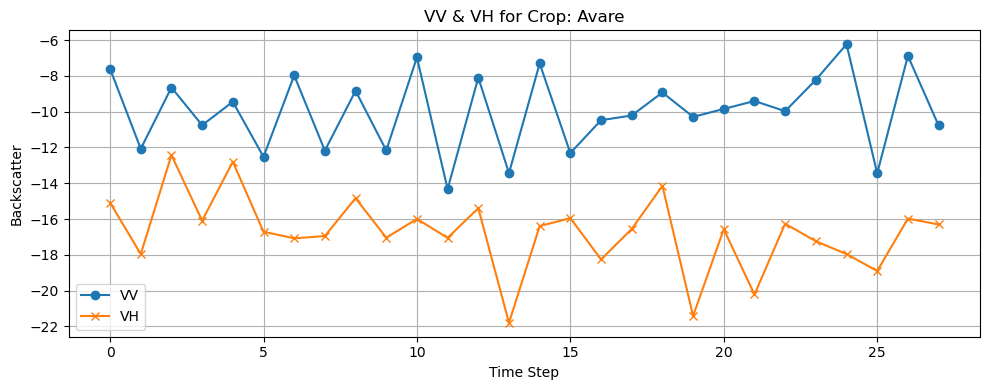

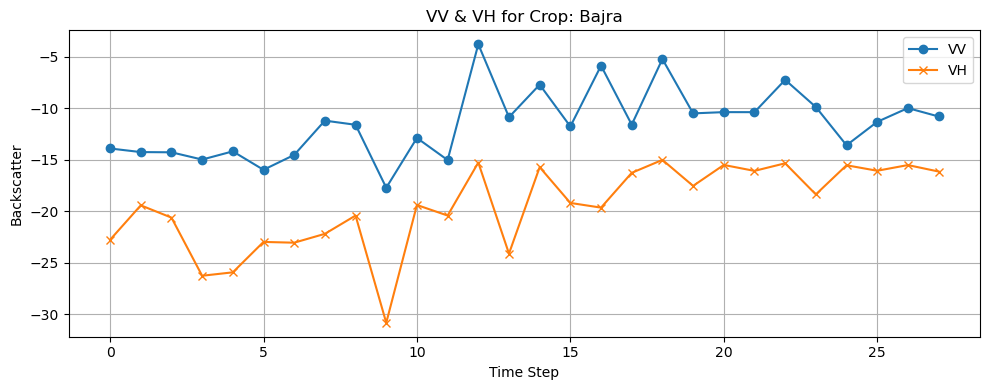

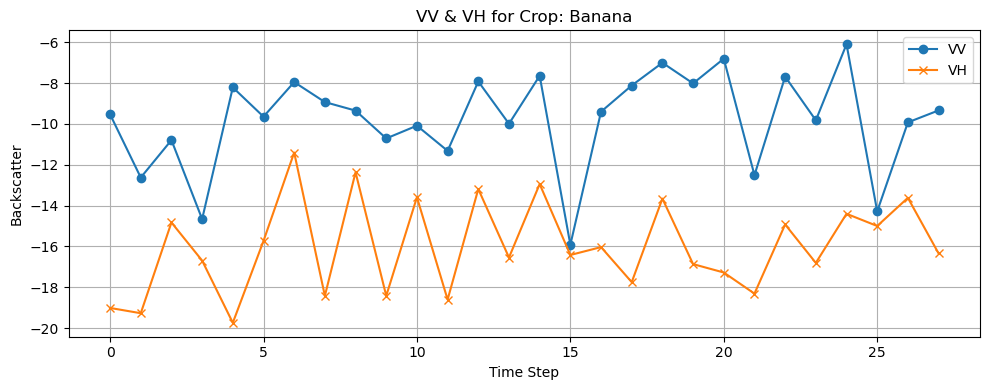

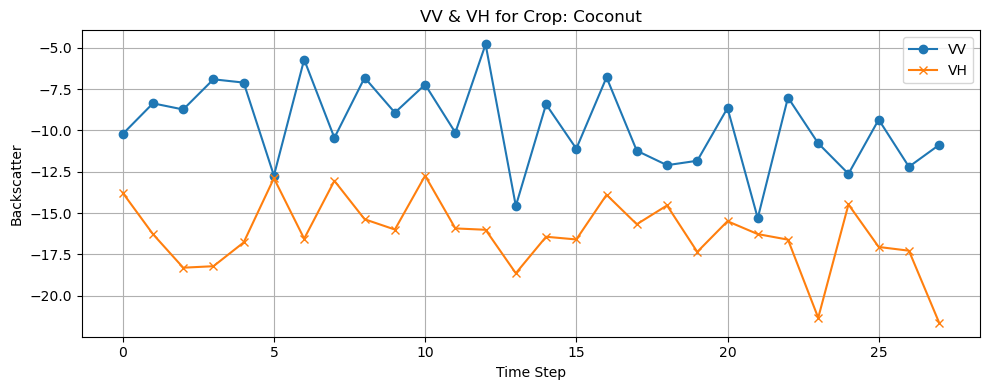

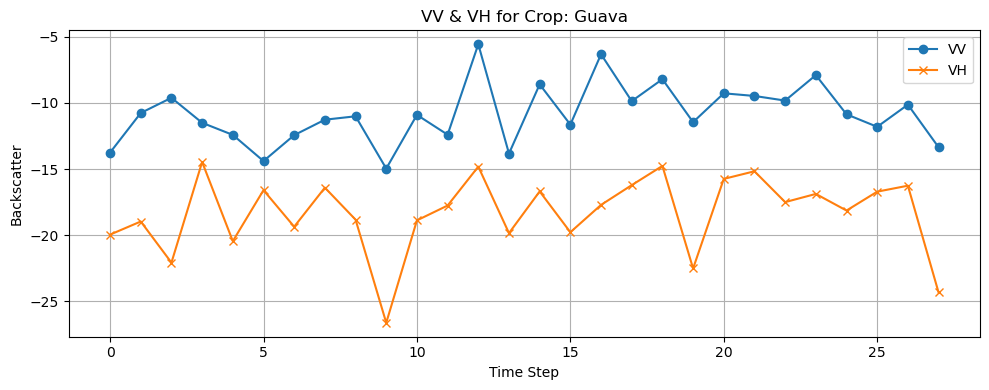

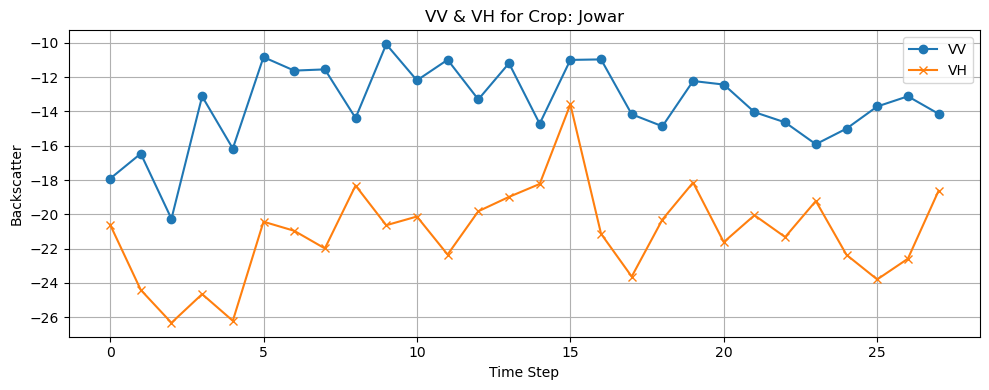

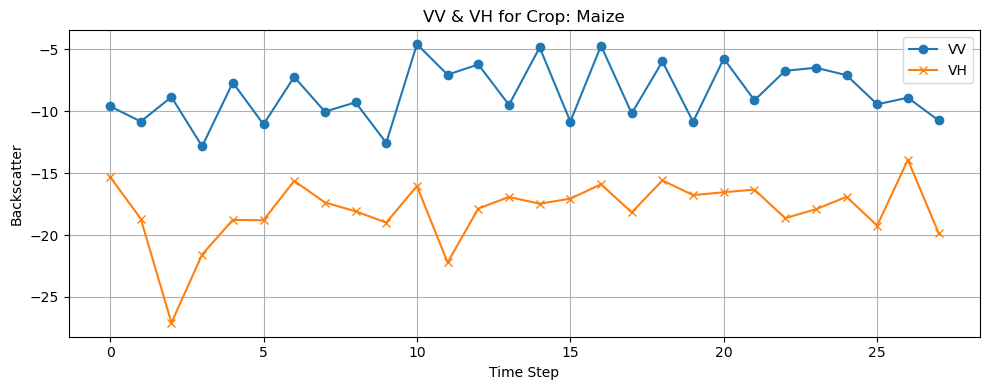

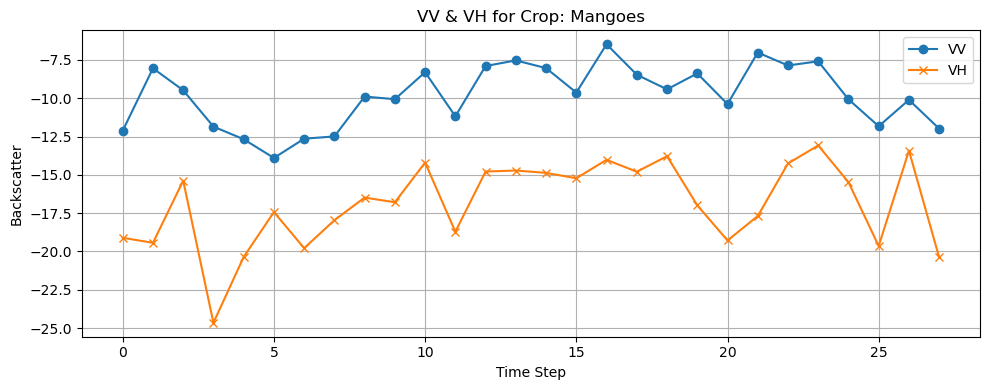

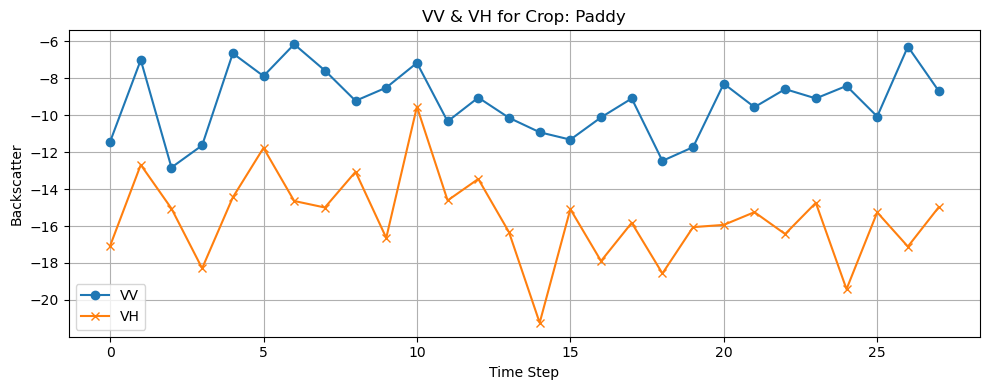

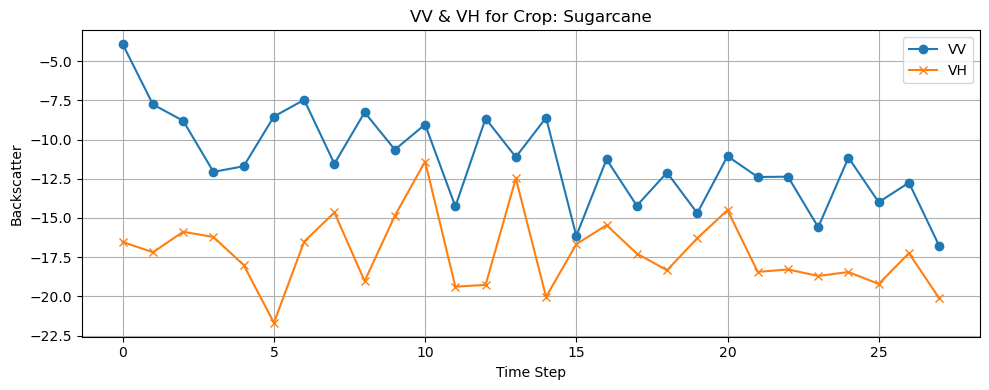

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import re

# Load the CSV
df = pd.read_csv("Karnataka_Datasets/Across/Begalavi/Begalavi_Kharif_Data_Final.csv")  # <-- Replace with your actual file path

# Identify VV and VH columns and sort them numerically
vv_cols = sorted([col for col in df.columns if re.match(r'VV_\d+', col)], key=lambda x: int(x.split('_')[1]))
vh_cols = sorted([col for col in df.columns if re.match(r'VH_\d+', col)], key=lambda x: int(x.split('_')[1]))

# For reproducibility
random.seed(42)

# Loop through each unique Crop_Name
for crop in df['Crop_Name'].dropna().unique():
    crop_group = df[df['Crop_Name'] == crop]
    
    # Randomly sample one row for that crop
    sample = crop_group.sample(n=1)
    
    # Extract VV and VH values
    vv_values = sample[vv_cols].values.flatten()
    vh_values = sample[vh_cols].values.flatten()

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(vv_cols)), vv_values, label='VV', marker='o')
    plt.plot(range(len(vh_cols)), vh_values, label='VH', marker='x')
    plt.title(f'VV & VH for Crop: {crop}')
    plt.xlabel('Time Step')
    plt.ylabel('Backscatter')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
